In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

## Importing dataset and feature selection

In [8]:
dataset = pd.read_excel('ANZdataset.xlsx')
dataset.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [12]:
data=dataset[["customer_id","age","txn_description","balance","amount"]]
data.head()

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25


In [13]:
print(data['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


In [14]:
plot_data= data.groupby(["customer_id"]).mean().reset_index()
plot_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796


# mean salary of each customer

In [16]:
salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


In [17]:
plot_data=pd.merge(plot_data, salary, on="customer_id")
plot_data.head()
#plot showing relationship of data.

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53,2275.852055,222.862603,970.47
1,CUS-1117979751,21,9829.929000,339.843700,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,3903.73


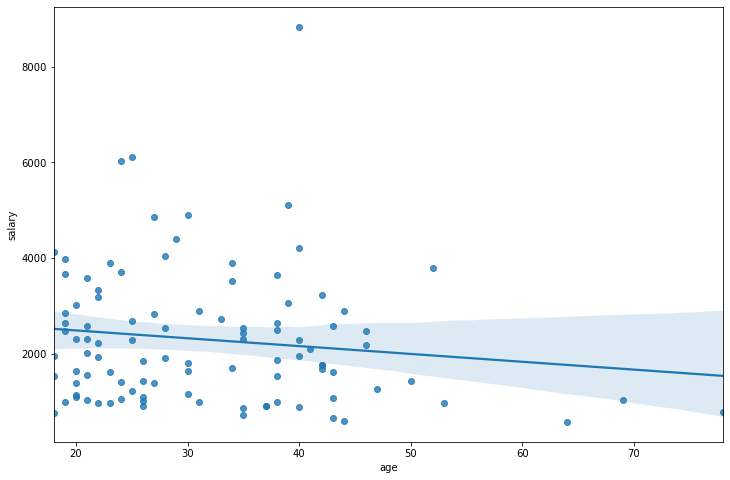

In [18]:
plt.figure(figsize=(12, 8))
sns.regplot("age", "salary", data=plot_data)
#graph betweeen salary and age

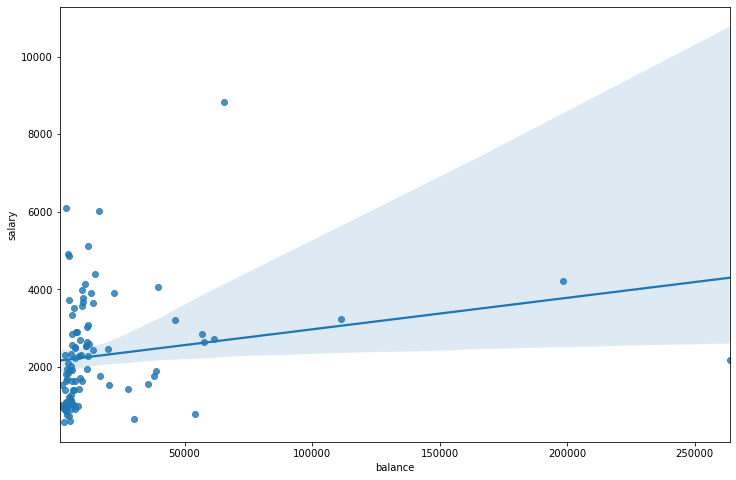

In [20]:
plt.figure(figsize=(12, 8))
sns.regplot("balance", "salary", fit_reg=True, data=plot_data)
#salary vs balance graph

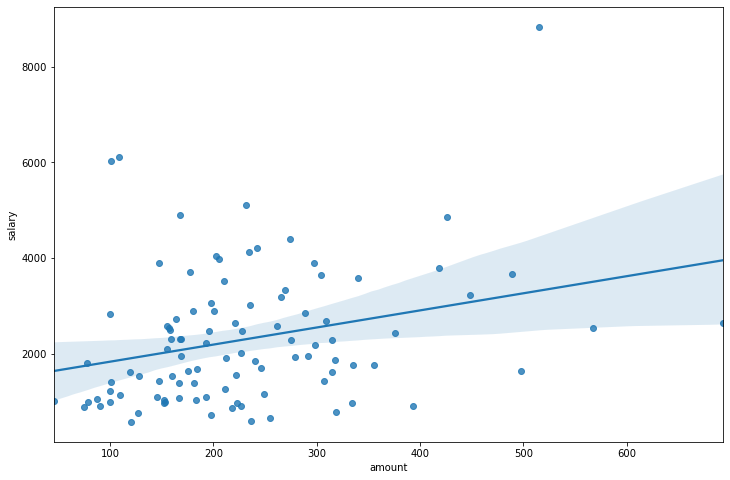

In [21]:
plt.figure(figsize=(12, 8))
sns.regplot("amount", "salary", fit_reg=True, data=plot_data)
#salary v/s amaount graph.

# Data Preparation


# Mean POS[Point of Sale] for each customer

In [22]:
pos=data[data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})
pos.head()
#customer's spending

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [23]:
len(pos)

100

# Mean payment done by Customer

In [24]:
payment=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [25]:
len(payment)

100

# Inter Bank Transfer by Each Customer(Mean)

In [26]:
interbank=data[data["txn_description"]=='INTER BANK'].groupby("customer_id").mean().reset_index()
interbank=interbank[["customer_id","amount"]]
interbank=interbank.rename(columns = {'amount':'interbank'})
interbank.head()

,customer_id,interbank
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


In [27]:
len(interbank)

68

# Phone/online pay  by customers(Mean)

In [29]:
phonebank=data[data["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})
phonebank.head()

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


In [30]:
len(phonebank)

16

# Merging relevant dataframes together

In [31]:
customer=data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
customer.head()

,customer_id,age,balance
0,CUS-1005756958,53,2275.852055
1,CUS-1117979751,21,9829.929000
2,CUS-1140341822,28,5699.212250
3,CUS-1147642491,34,9032.841186
4,CUS-1196156254,34,22272.433755


In [32]:
d1=pd.merge(customer, payment, on="customer_id")
d1=pd.merge(d1, pos, on="customer_id")
d1=pd.merge(d1, salary, on="customer_id")
d1.head()

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73


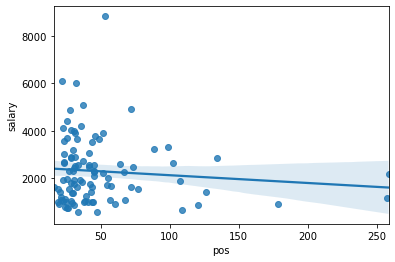

In [35]:
sns.regplot("pos", "salary", fit_reg=True, data=d1)
#salary vs POS

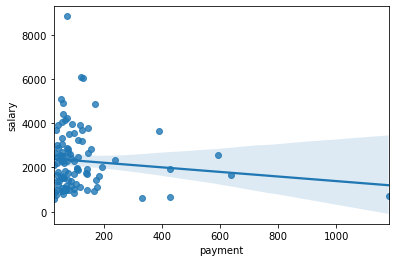

In [33]:
sns.regplot("payment", "salary", fit_reg=True, data=d1)
#Payment v/s Salary

# Model building and predictive analytics

# Linear Regression Model

In [143]:
X=d1[["age","balance","payment","pos"]].values
y=d1["salary"].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [144]:
lr=LinearRegression()

In [145]:
lr.fit(X_train, y_train)
lr.score(X, y)

0.10561838985893524

In [146]:
y_pred=lr.predict(X_test)
r2=r2_score(y_test, y_pred)
print('Coefficient of determination: ',r2)

Coefficient of determination:  -0.07574308330744173


In [147]:
print(lr.intercept_)
print(lr.coef_)

3310.6227936294795
[-2.45207939e+01  1.35776468e-02  1.55790401e-01 -8.71687506e+00]


In [148]:
print("Salary prediction of model is")
print(lr.predict([[50,500,39,47]])[0])

Salary prediction of model is
1687.7546221403118


# Decision Tree-Classification and Regression

In [150]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [151]:
print("Salary prediction of model is")
print(dt.predict([[50,500,39,47]])[0])

Salary prediction of model is
1068.0400000000004


# Data Segmentation[K-means Clustering]

In [152]:
d1

,customer_id,age,balance,payment,pos,salary,label
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47,0
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65,0
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51,0
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39,0
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73,0
...,...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,1180.000000,25.022143,725.32,0
96,CUS-809013380,21,3756.902903,70.136364,22.255098,1037.07,0
97,CUS-860700529,30,3462.276009,41.933333,28.164845,1808.62,0
98,CUS-880898248,26,8528.830385,77.500000,20.101429,1433.98,0


In [153]:
X=d1[["age","balance","payment","pos","salary"]]
X.shape

(100, 5)

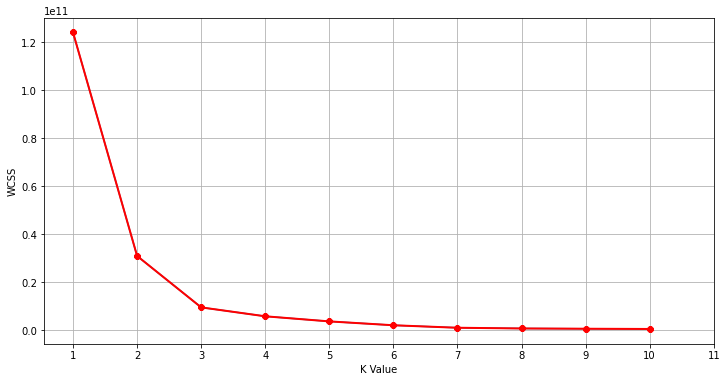

In [154]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,12,1))
plt.ylabel("WCSS")
plt.show()
%matplotlib inline

In [155]:
km=KMeans(n_clusters=3)
clusters = km.fit_predict(X)
d1["label"] = clusters
d1

,customer_id,age,balance,payment,pos,salary,label
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47,1
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65,1
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51,1
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39,1
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73,1
...,...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,1180.000000,25.022143,725.32,1
96,CUS-809013380,21,3756.902903,70.136364,22.255098,1037.07,1
97,CUS-860700529,30,3462.276009,41.933333,28.164845,1808.62,1
98,CUS-880898248,26,8528.830385,77.500000,20.101429,1433.98,1


In [156]:
print("First Group: ")
print(" ")
print(d1[d1["label"]==0])

First Group: 
 
       customer_id  age        balance     payment         pos   salary  label
17  CUS-1609060617   19   56685.795802   75.454545  134.343000  2854.74      0
21  CUS-1646183815   78   54240.641471   58.437500   23.736667   782.42      0
27  CUS-1816693151   40   65420.404231   73.567568   52.825455  8835.98      0
33  CUS-2059096722   21   35816.951949   58.914286   27.022973  1560.20      0
53  CUS-2663907001   28   39427.873576   55.192771   28.165200  4054.77      0
57  CUS-2819545904   42  111300.797619  109.800000   88.541818  3231.26      0
60  CUS-3117610635   33   61491.350647   76.863636   36.737391  2718.51      0
63  CUS-3151318058   42   37842.077755   75.684211   30.715000  1757.82      0
67  CUS-3249305314   38   38687.672843  111.214286  107.296250  1880.95      0
77  CUS-3462882033   22   46338.733837  124.500000   29.371304  3195.01      0
87   CUS-495599312   38   57566.579032  144.500000  102.412500  2647.38      0


In [157]:
print("Second Group: ")
print(" ")
print(d1[d1["label"]==1])

Second Group: 
 
       customer_id  age       balance      payment        pos   salary  label
0   CUS-1005756958   53   2275.852055   144.000000  28.769615   970.47      1
1   CUS-1117979751   21   9829.929000    98.925000  23.321923  3578.65      1
2   CUS-1140341822   28   5699.212250   142.000000  34.781282  1916.51      1
3   CUS-1147642491   34   9032.841186    96.185185  54.271316  1711.39      1
4   CUS-1196156254   34  22272.433755    43.100000  31.157432  3903.73      1
..             ...  ...           ...          ...        ...      ...    ...
95    CUS-72755508   35   4497.557069  1180.000000  25.022143   725.32      1
96   CUS-809013380   21   3756.902903    70.136364  22.255098  1037.07      1
97   CUS-860700529   30   3462.276009    41.933333  28.164845  1808.62      1
98   CUS-880898248   26   8528.830385    77.500000  20.101429  1433.98      1
99   CUS-883482547   19   9877.452697    91.446809  30.635098  3977.46      1

[87 rows x 7 columns]


In [158]:
print("Final Group: ")
print(" ")
print(d1[d1["label"]==2])

Final Group: 
 
       customer_id  age        balance    payment         pos   salary  label
43  CUS-2370108457   46  263753.766119  61.750000  258.643636  2179.96      2
91   CUS-527400765   40  198565.143775  72.216216   35.570500  4216.04      2
